In [13]:
import numpy as np
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [14]:
#create sequence: 1 to 100
sequence=np.arange(1,101)

In [15]:
#Define window size(eg.,3 inputs-> 1 output)
window_size=3
x=[]
y=[]

In [16]:
#create input output pairs
for i in range(len(sequence)-window_size):
    x.append(sequence[i:i+window_size])
    y.append(sequence[i+window_size])

In [17]:
#convert to numpy arrays
x=np.array(x)
y=np.array(y)

In [18]:
#Reshape x to [sample, timesteps, features]
x=x.reshape((x.shape[0],x.shape[1],1))

In [19]:
model=Sequential()
model.add(LSTM(50,activation='relu',input_shape=(window_size,1)))
model.add(Dense(1)) #output layer
model.compile(optimizer='adam',loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.fit(x,y,epochs=500,verbose=0)
print("Model trained successfully")

Model trained successfully


In [21]:
test_input=np.array([8,9,10])
test_input=test_input.reshape((1,window_size,1)) #Reshape the prediction
predicted=model.predict(test_input,verbose=0)
print(f"Predicted the next number: {predicted[0][0]:.2f}")

Predicted the next number: 10.91


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


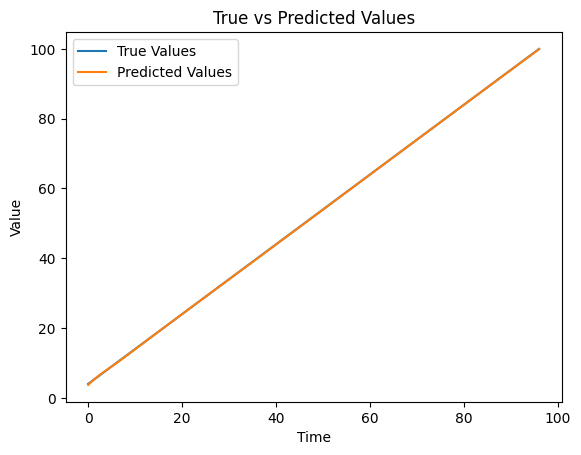

In [22]:
predictions=model.predict(x)
plt.plot(y,label='True Values')
plt.plot(predictions,label='Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('True vs Predicted Values')
plt.show()